<a href="https://colab.research.google.com/github/codemishka/Project-2/blob/main/Project_2_Part%204_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 - Part 4 (Core)
> Mishka Janghbahadur

# Part 2: Stroke Prediction Dataset

1. Source of data
>https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
2. Brief description of data
>This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


3. What is the target?
> Stroke(either true or not)
4. What does one row represent? (A person? A business? An event? A product?)
>Each row represents a singular individual and that individual's data related to their health

5. Is this a classification or regression problem?
>binary regression

6. How many features does the data have?
>11 features, one target
7. How many rows are in the dataset?
>44678
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
>missing values and inconsistent object data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
fpath2 = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv"
df2 = pd.read_csv(fpath2)
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Remove duplicates
df2 = df2.drop_duplicates()
df2.duplicated().sum()

0

In [10]:
# Set the index to PID
df2 = df2.set_index("id")

In [11]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
# Saving list of column names for object cols
cat_cols2 = df2.select_dtypes('object').columns
cat_cols2

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [13]:
# Checking which categorical columns had missing values.
df2[cat_cols2].isna().sum()
#nothing to fix

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [14]:
# Saving list of column names for numeric cols
num_cols2 = df2.select_dtypes('number').columns
num_cols2

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [15]:
# Checking which numerical columns had missing values.
df2[num_cols2].isna().sum()
#fix bmi

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [16]:
median_value = df2['bmi'].median()
df2['bmi'] = df2['bmi'].fillna(median_value)
#fixed missing numeric values with median

In [17]:
df2.describe().round(2)
#only the bmi column data seems to have impossible max values.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,5110.00,5110.00
mean,43.23,0.1,0.05,106.15,28.86,0.05
std,22.61,0.3,0.23,45.28,7.70,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.80,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,32.80,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [18]:
bmi_over_70 = df2['bmi'] > 70

df2[bmi_over_70]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [19]:
df2.drop(index=545, inplace = True)
df2.drop(index=41097, inplace = True)
df2.drop(index=56420, inplace = True)
df2.drop(index=51856, inplace = True)
#dropped outliers with bmi over 70

In [20]:
for col in cat_cols2:
    print(f'- {col}:')
    print(df2[col].value_counts(dropna=False))
    print("\n\n")
    #remove 'Other' from gender data

- gender:
Female    2993
Male      2112
Other        1
Name: gender, dtype: int64



- ever_married:
Yes    3351
No     1755
Name: ever_married, dtype: int64



- work_type:
Private          2921
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Residence_type:
Urban    2595
Rural    2511
Name: Residence_type, dtype: int64



- smoking_status:
never smoked       1890
Unknown            1543
formerly smoked     885
smokes              788
Name: smoking_status, dtype: int64





In [21]:
# Create a filter for Packaging values that contain "individual"
filter_gender = df2['gender'].str.contains('Other')
# Apply the filter
df2.loc[filter_gender]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [22]:
# Use the inversion operator to get all values that do NOT meet the filter conditions
df2=df2[~filter_gender]
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


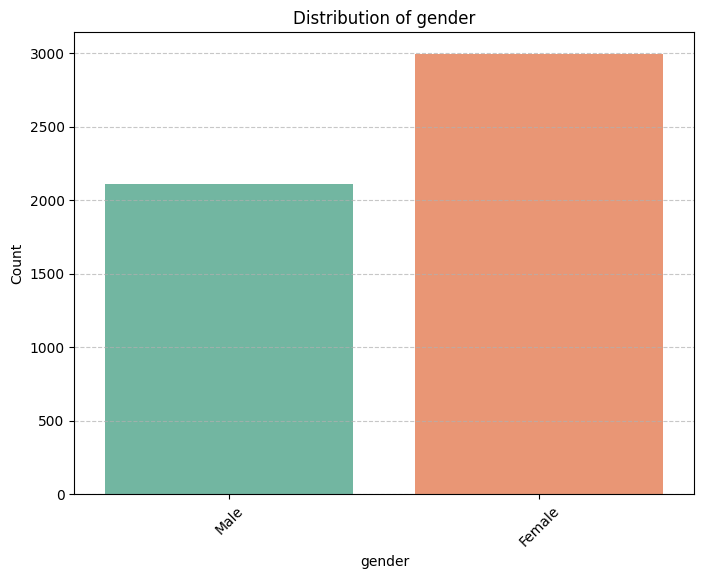

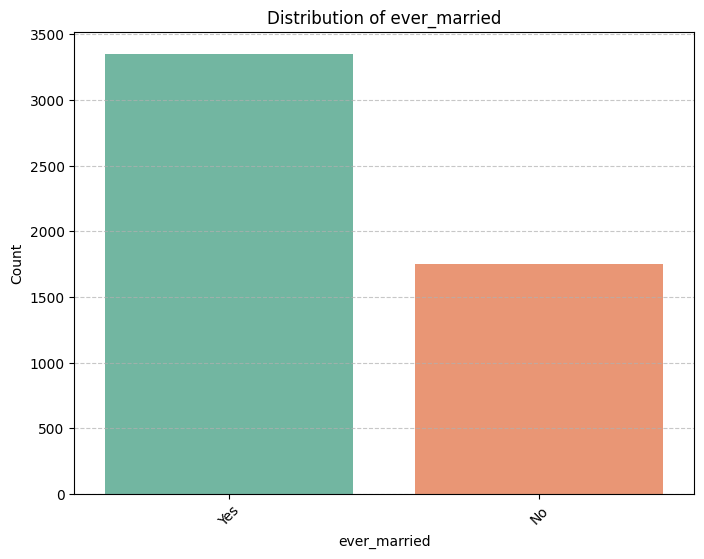

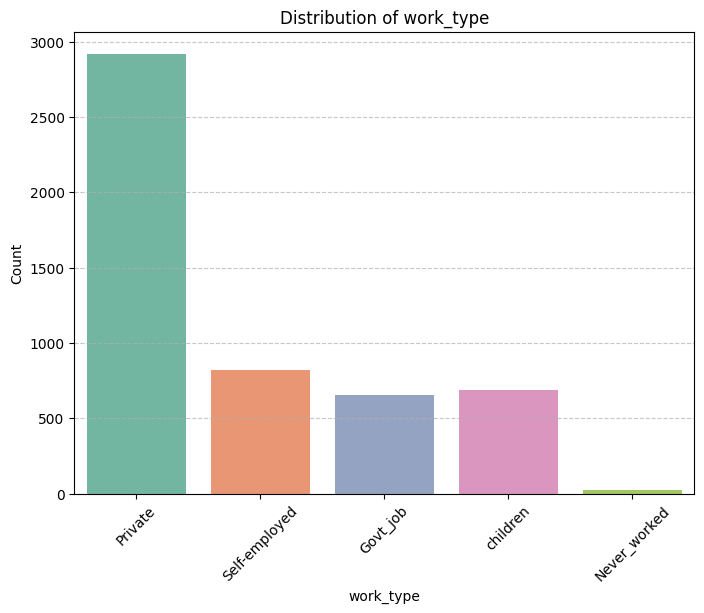

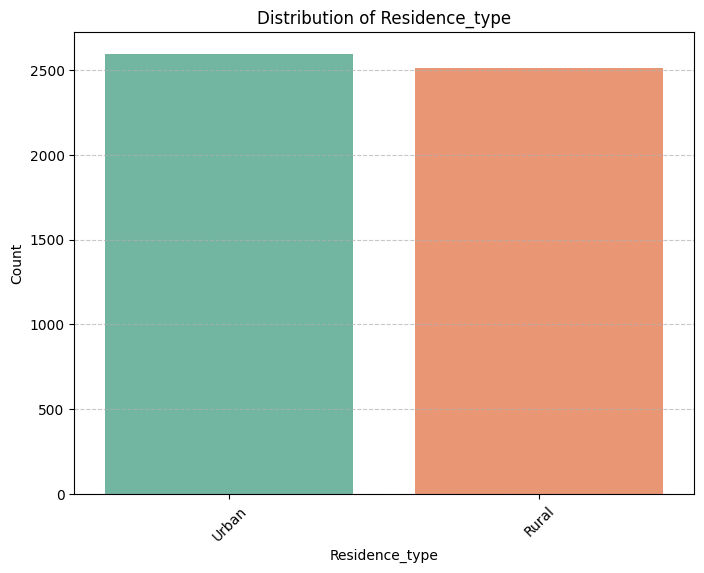

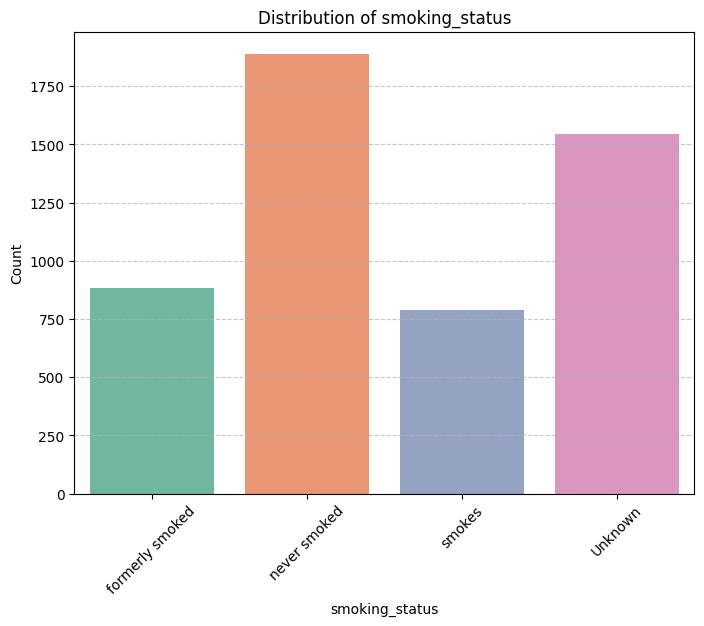

In [23]:
# Categorical Variables

for col in cat_cols2:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df2, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

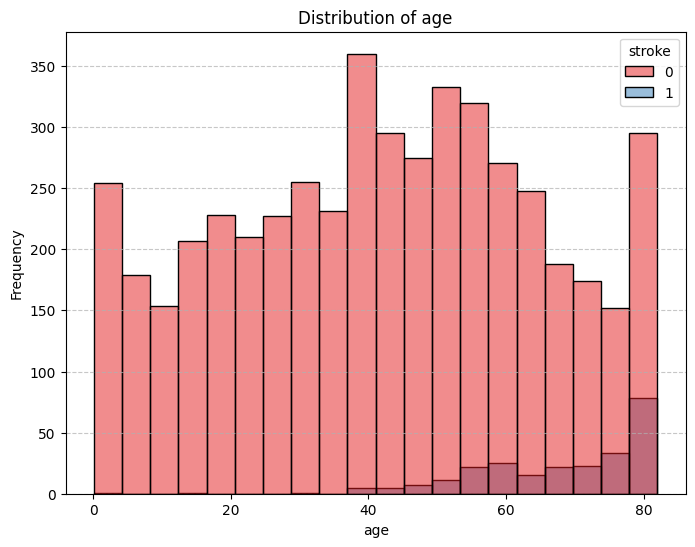

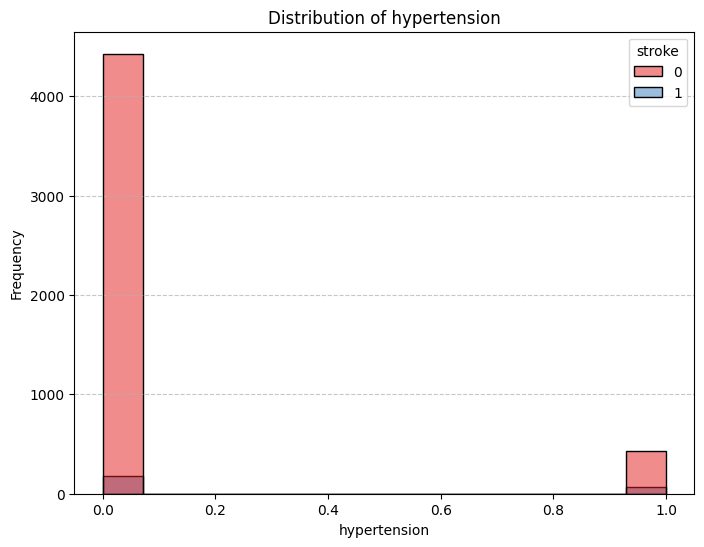

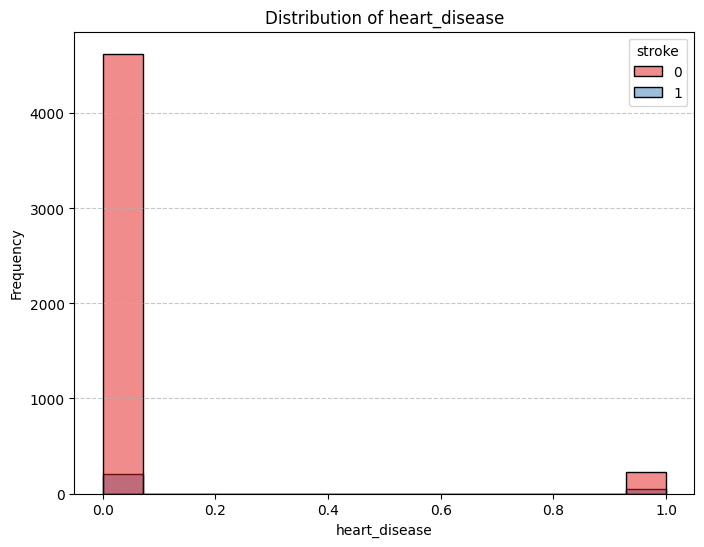

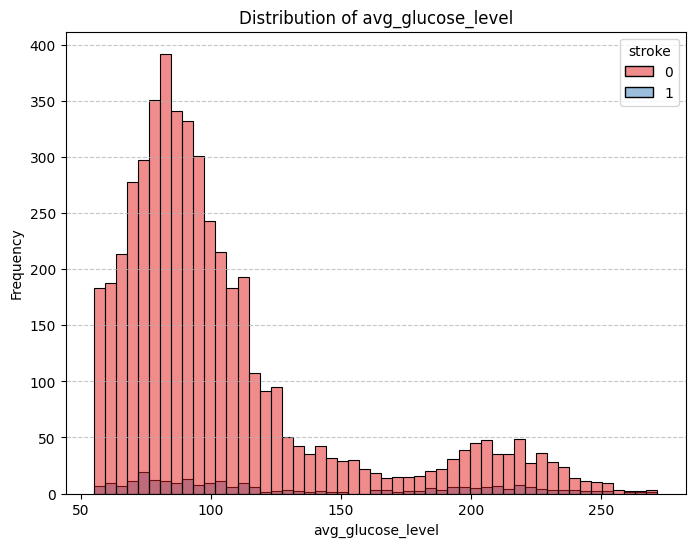

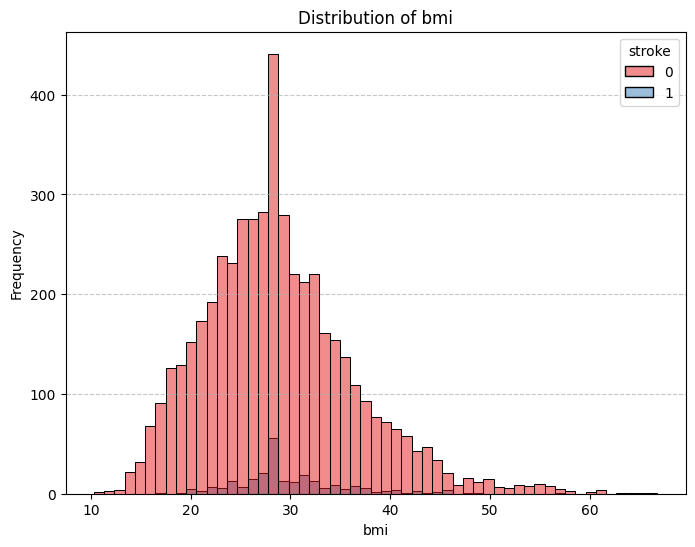

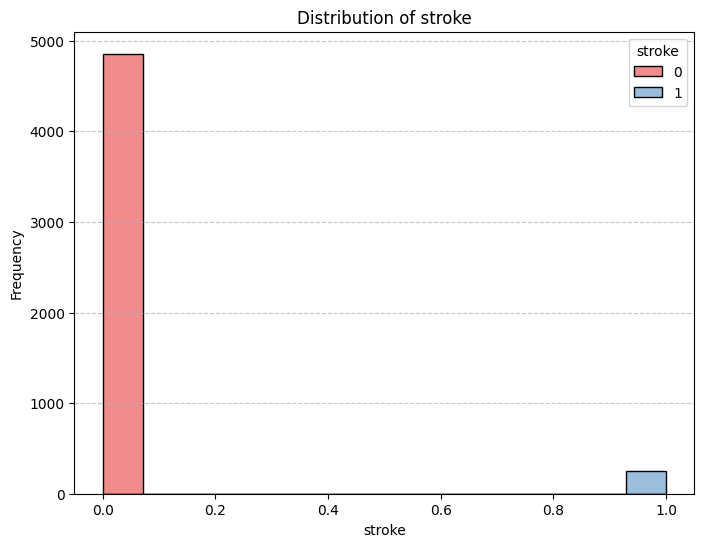

In [30]:
# Numeric Variables

num_cols = df2.select_dtypes(['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df2, x=col, hue='stroke', palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-25-c0ca9485b151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,cmap='coolwarm');


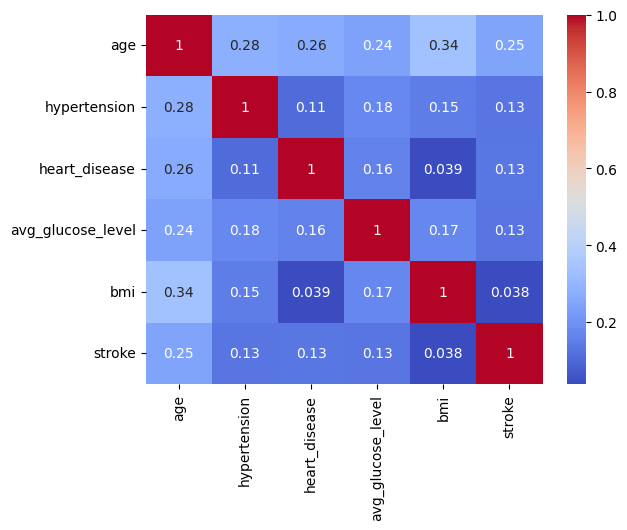

In [25]:
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm');
#There is a weak correlation between the attributes as per the plotted heatmap
#The highest correlation found was between age and bmi - 0.32
#Rest all correlations were less than 0.32
#We cannot not extrapolate statistical insight from heatmap

## One Hot Encoding of Categorical Variables

In [35]:
# Converting numeric-binary value attributes to string
df2[['hypertension', 'heart_disease', 'stroke']] = df2[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df2 = pd.get_dummies(df2, drop_first= True)


In [41]:
# The data frame after performing dummy attributes
df2.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
id,,,,,,,,,,,,,,,,
9046,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
51676,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
31112,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
60182,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
1665,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


Given the significant undersampling of our dataset in terms of target instances, we are inclined to implement an oversampling technique to ensure an equitable representation of both target classes. Specifically, we plan to employ random oversampling, and we will commence by importing the requisite library.

Oversampling and Randomizing Datasets

In [39]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df2.drop(['stroke_1'],axis=1)
y=df2['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [40]:
# creating dataset split for training and testing the model

# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

# Modeling Data

### Decision Tree

In [42]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [43]:

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9768399382398353


### KNN

In [44]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [45]:
# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9773546062789501
ROC AUC Score: 0.9775051124744376


### Random Forest

In [46]:

# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [47]:

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))



Accuracy: 0.993309315491508


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

# Print Classification Report
class_report = classification_report(y_test, y_pred_rf)
print('Classification Report:')
print(class_report)


Precision: 0.9867075664621677
Recall: 1.0
F1-Score: 0.9933093154915079
Confusion Matrix:
[[965  13]
 [  0 965]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       978
           1       0.99      1.00      0.99       965

    accuracy                           0.99      1943
   macro avg       0.99      0.99      0.99      1943
weighted avg       0.99      0.99      0.99      1943



In [54]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  99.36143990496798
[0.99382716 0.99382716 0.99588477 0.98971193 0.99382716 0.99588477
 1.         0.99588477 0.99176955 0.99588477 1.         0.99382716
 1.         0.99381443 0.98969072 0.98556701 0.99175258 0.98762887
 0.99587629 0.98762887]


Looking at the results:

Precision: Our model shows impressive precision, approximately 98.7%. This means it's excellent at correctly identifying positive cases (Class 1) while keeping false positives to a minimum.

Recall: The recall score is a perfect 100%, which is a fantastic result. It means our model manages to capture all relevant instances of Class 1 without missing any.

F1-Score: The F1-Score, around 99.3%, reflects a balanced performance, striking a good compromise between precision and recall. In other words, it excels at minimizing both false positives and false negatives.

Now, let's dive into the Confusion Matrix:

Confusion Matrix: It's quite informative. We have 965 true positives, which is great, and only 13 false positives, showing that the model is doing an admirable job.
The Classification Report provides a neat summary:

Classification Report: For both Class 0 and Class 1, the precision, recall, and F1-Score are outstanding. This means the model is consistently strong across both categories.
Overall, our Random Forest Classifier demonstrates exceptional performance with a 99% accuracy rate. It excels at correctly classifying instances in the dataset, and its precision and recall scores highlight its reliability. These results indicate a promising model for our task.

## Model Hypertuning and Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create your RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # Add other hyperparameters as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='recall',  # Use an appropriate scoring metric
    verbose=1  # Verbosity level
)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Perform predictions or other tasks with the best estimator
y_pred = best_estimator.predict(X_test)

# You can also access other attributes such as cv_results_, etc.

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
